<a href="https://colab.research.google.com/github/gustavoramos82/Classificando-Fake-News-/blob/main/Notebooks/An%C3%A1lise%20de%20cluster/An%C3%A1lise_de_Cluster_noticias_falsas_(subject).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de cluster das noticias falsas (subject)

Neste notebook será feito a análise de cluster só que dessa vez, além do atributo título que foi feito, agora será feito com o atributo subject

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD

from yellowbrick.cluster import KElbowVisualizer

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
fake = true = pd.read_csv(r'/content/drive/MyDrive/Datasets/Fake news deep/Prata/Fake_tratado.csv',lineterminator='\n')
fake.drop('Unnamed: 0',axis=1,inplace=True)
fake.head()

,title,text,subject,date
0,donald trump send embarrass new year eve mess...,donald trump wish american happi new year leav...,News,2017-12-31
1,drunk brag trump staffer start russian collus...,hous intellig committe chairman devin nune go ...,News,2017-12-31
2,sheriff david clark becom internet joke threa...,friday reveal former milwauke sheriff david cl...,News,2017-12-30
3,trump obsess even obama name code websit imag,christma day donald trump announc would back ...,News,2017-12-29
4,pope franci call donald trump christma speech,pope franci use annual christma day messag reb...,News,2017-12-25


In [3]:
fake['date'] = pd.to_datetime(fake['date'])
fake['ano'] = fake['date'].dt.year
fake.dropna(inplace=True)
fake['ano'] = fake['ano'].astype(int)
fake.head()

,title,text,subject,date,ano
0,donald trump send embarrass new year eve mess...,donald trump wish american happi new year leav...,News,2017-12-31,2017
1,drunk brag trump staffer start russian collus...,hous intellig committe chairman devin nune go ...,News,2017-12-31,2017
2,sheriff david clark becom internet joke threa...,friday reveal former milwauke sheriff david cl...,News,2017-12-30,2017
3,trump obsess even obama name code websit imag,christma day donald trump announc would back ...,News,2017-12-29,2017
4,pope franci call donald trump christma speech,pope franci use annual christma day messag reb...,News,2017-12-25,2017


In [4]:
tdif = TfidfVectorizer()
matr_title = tdif.fit_transform(fake.text)

In [5]:
trun_svd = TruncatedSVD(n_components=10)
matr_title = trun_svd.fit_transform(matr_title)

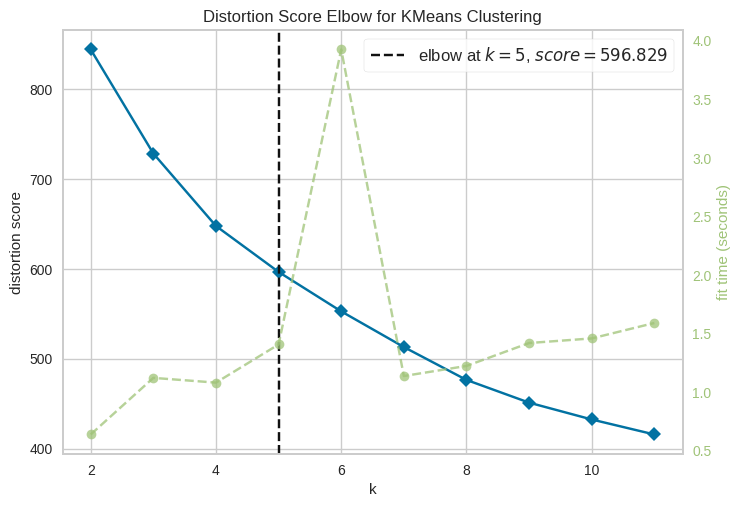

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans,k=(2,12))
elbow.fit(matr_title)
elbow.show()

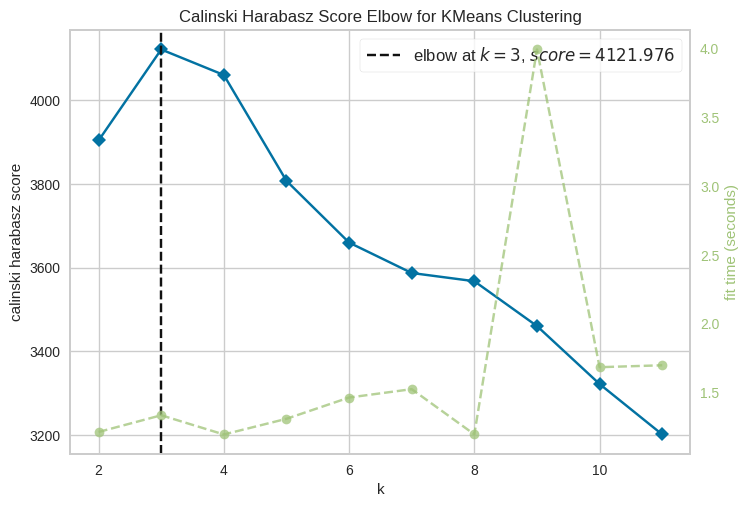

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [7]:
elbow_cal = KElbowVisualizer(kmeans,k=(2,12), metric='calinski_harabasz')
elbow_cal.fit(matr_title)
elbow_cal.show()

In [19]:
kmeans = KMeans(n_clusters=3)
matr_title = tdif.fit_transform(fake.title)
kmeans.fit(matr_title)
fake['cluster_text'] = kmeans.labels_
fake.head()

,title,text,subject,date,ano,cluster_text
0,donald trump send embarrass new year eve mess...,donald trump wish american happi new year leav...,News,2017-12-31,2017,1
1,drunk brag trump staffer start russian collus...,hous intellig committe chairman devin nune go ...,News,2017-12-31,2017,1
2,sheriff david clark becom internet joke threa...,friday reveal former milwauke sheriff david cl...,News,2017-12-30,2017,0
3,trump obsess even obama name code websit imag,christma day donald trump announc would back ...,News,2017-12-29,2017,1
4,pope franci call donald trump christma speech,pope franci use annual christma day messag reb...,News,2017-12-25,2017,1


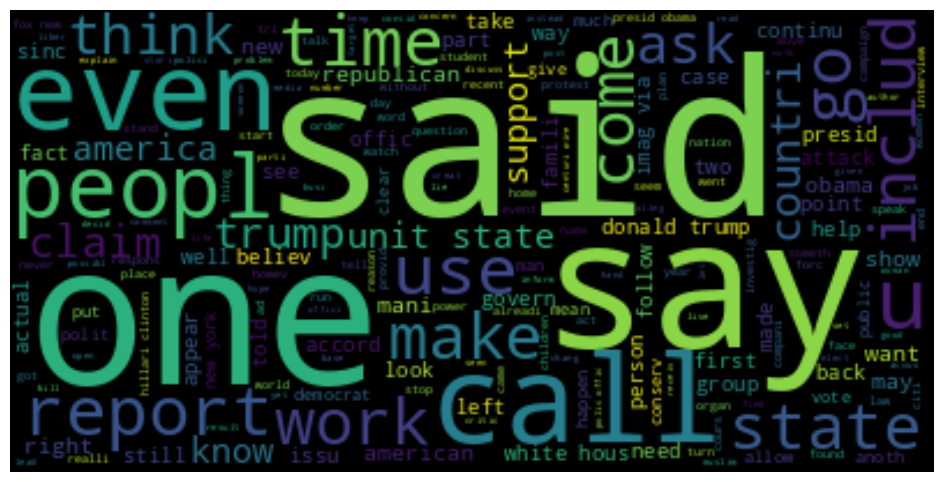

In [20]:
text_cluster_0 = " ".join(i for i in fake[fake['cluster_text']==0]['text'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black").generate(text_cluster_0)
plt.figure( figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

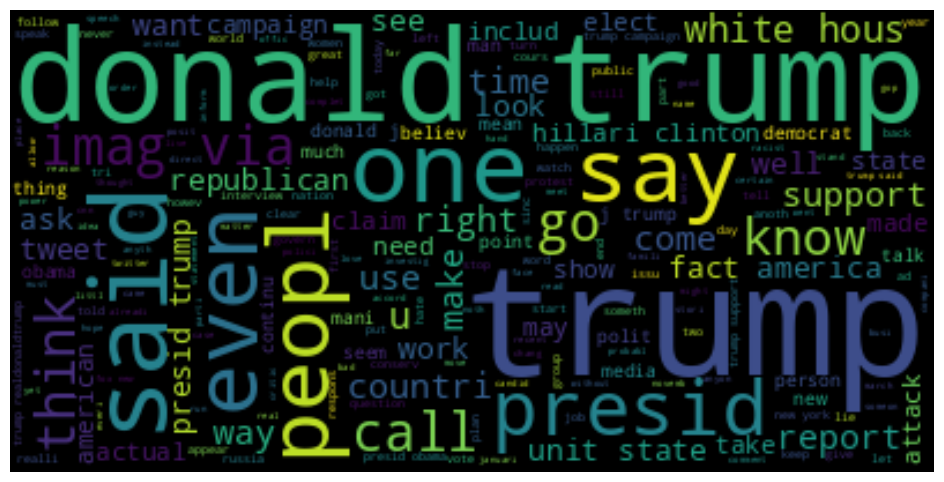

In [21]:
text_cluster_1 = " ".join(i for i in fake[fake['cluster_text']==1]['text'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black").generate(text_cluster_1)
plt.figure( figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

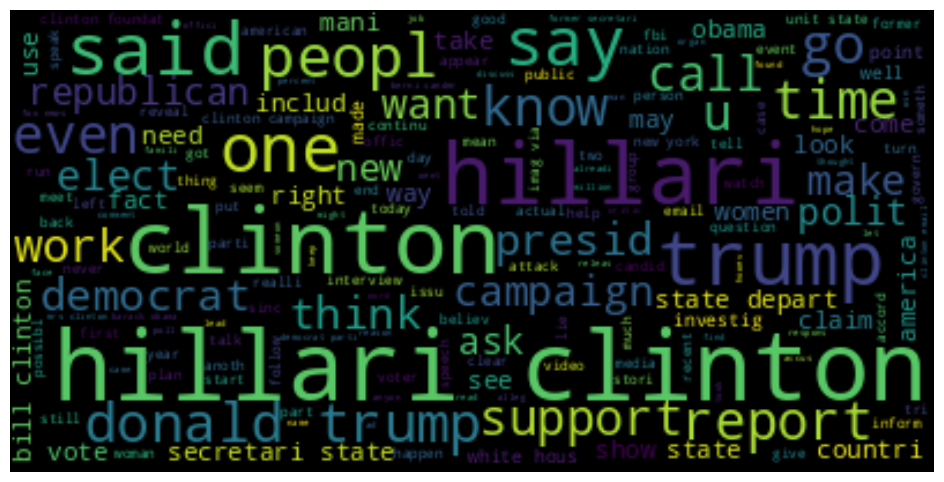

In [22]:
text_cluster_2 = " ".join(i for i in fake[fake['cluster_text']==2]['text'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black").generate(text_cluster_2)
plt.figure( figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Assim, podemos ver que foi separado em três clusters, que são eles:
- **cluster 0**: refrentes a chamadas de noticias com say, one, entre outros
- **cluster 1**: noticias referentes a trump
- **cluster 2**: Noticias referentes a hillari clinton

Text(0, 0.5, 'Quantidade')

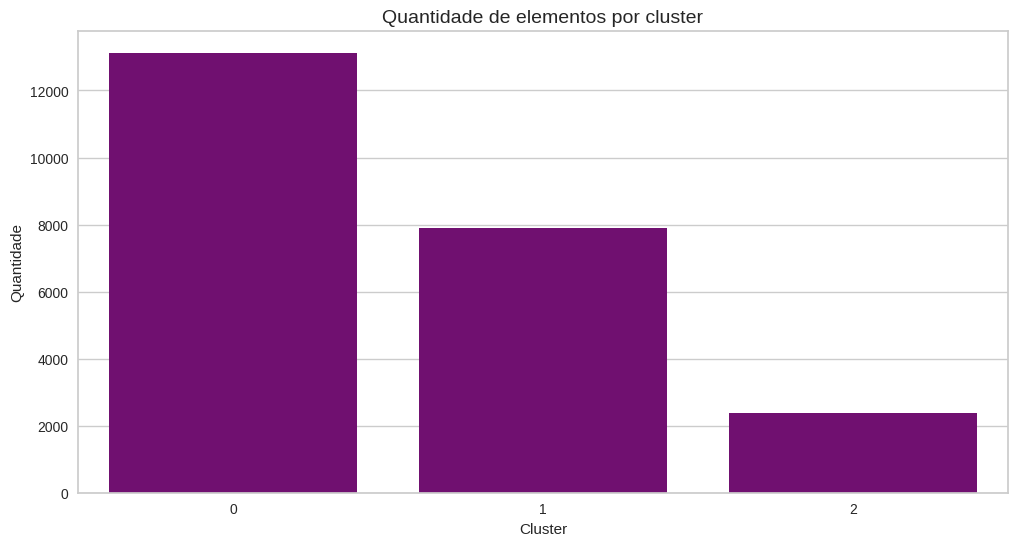

In [24]:
plt.figure(figsize=(12,6))
plt.title('Quantidade de elementos por cluster',fontsize=14)
sns.countplot(x='cluster_text',data=fake,color='purple')
plt.xlabel('Cluster')
plt.ylabel('Quantidade')

Text(0, 0.5, 'Quantidade')

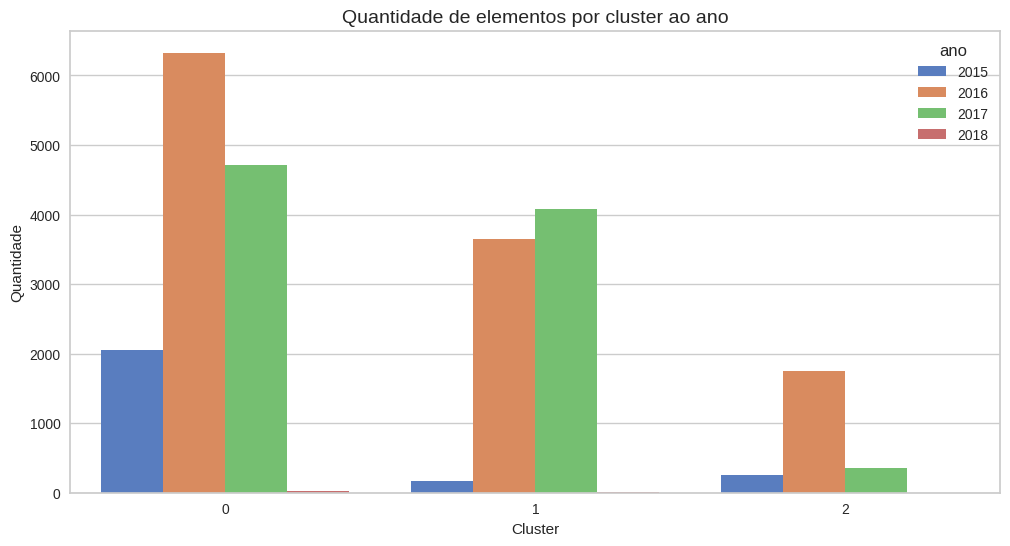

In [29]:
plt.figure(figsize=(12,6))
plt.title('Quantidade de elementos por cluster ao ano',fontsize=14)
sns.countplot(x='cluster_text',data=fake,color='purple',hue='ano',
              palette='muted')
plt.xlabel('Cluster')
plt.ylabel('Quantidade')

Text(0, 0.5, 'Quantidade')

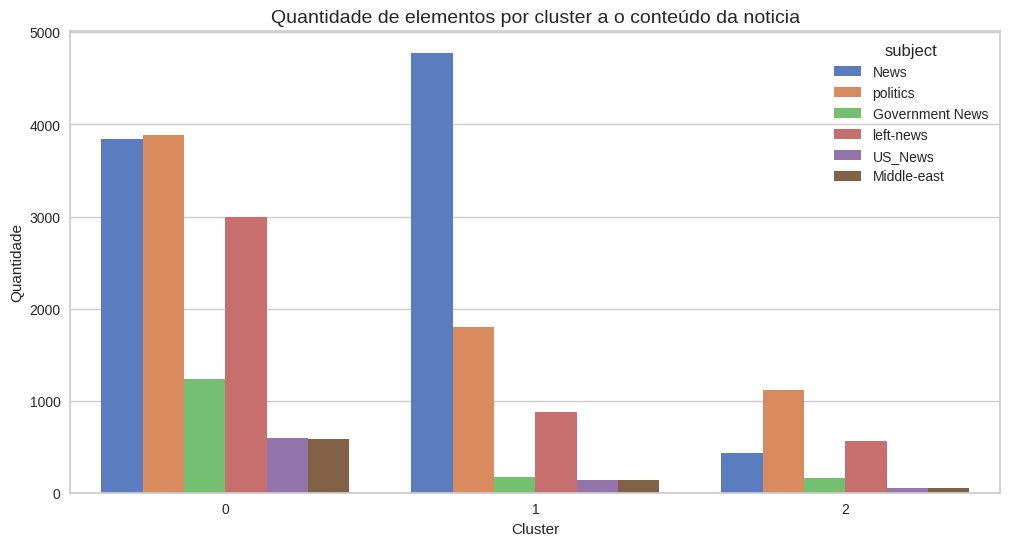

In [28]:
plt.figure(figsize=(12,6))
plt.title('Quantidade de elementos por cluster a o conteúdo da noticia',fontsize=14)
sns.countplot(x='cluster_text',data=fake,hue='subject',
              palette='muted')
plt.xlabel('Cluster')
plt.ylabel('Quantidade')